# Machine Learning - Assignment

## Comparison between 3 classifier models:
* Random Forest
* Multi Linear Regression
* K-Nearest Neighbors

In [69]:
#  Import libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Training models
from sklearn.ensemble import RandomForestRegressor      # Random Forest
from sklearn.linear_model import LinearRegression       # Linear Regression
from sklearn.neighbors import KNeighborsRegressor       # K-Nearest Neighbor
    
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib 

## Loading and preprocessing data

In [70]:
#  Load red wine data.
data = pd.read_csv('winequality-red.csv')

In [71]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [73]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [74]:
#  Split data into training and test sets
y = data.quality
X = data.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

## Random Forest Regression

In [75]:
tic1 = time.perf_counter()

# Declare data preprocessing steps
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))

# Declare hyperparameters to tune
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

# Tune model using cross-validation pipeline
clf1 = GridSearchCV(pipeline, hyperparameters, cv=10)
clf1.fit(X_train, y_train)

# Refit on the entire training set
# No additional code needed if clf1.refit == True (default is True)

# Evaluate model pipeline on test data
RF_pred = clf1.predict(X_test)

toc1 = time.perf_counter()

print("R2 score is: ", r2_score(y_test, RF_pred))
print("Mean Squared Error is: ", mean_squared_error(y_test, RF_pred))
print("Execution Time: ", toc1 - tic1, "seconds")

R2 score is:  0.4686007627580362
Mean Squared Error is:  0.34289781250000007
Execution Time:  22.19412049999937 seconds


In [76]:
# Save model for future use
joblib.dump(clf1, 'rf_regressor.pkl')
# To load: clf1 = joblib.load('rf_regressor.pkl')

['rf_regressor.pkl']

## Multi Linear Regression

In [77]:
tic2 = time.perf_counter()

# Training the Multiple Linear Regression model on the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
MLR_pred = regressor.predict(X_test)

toc2 = time.perf_counter()

print("R2 score is: ", r2_score(y_test, MLR_pred))
print("Mean Squared Error is: ", mean_squared_error(y_test, MLR_pred))
print("Execution Time: ", toc2 - tic2, "seconds")

R2 score is:  0.3026000269960395
Mean Squared Error is:  0.4500136778926729
Execution Time:  0.005968599999505386 seconds


## K-NN Classifier

In [78]:
tic3 = time.perf_counter()

# Declare data preprocessing steps
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         KNeighborsRegressor(n_neighbors=5))

# Declare hyperparameters to tune
hyperparameters = { 'kneighborsregressor__n_neighbors' : [1, 5, 10, 50]}

# Tune model using cross-validation pipeline
clf2 = GridSearchCV(pipeline, hyperparameters, cv=10)
knnreg = clf2.fit(X_train, y_train)

# Prediction on the test dataset
KNN_pred = knnreg.predict(X_test)

toc3 = time.perf_counter()

print("R2 score is: ", r2_score(y_test, KNN_pred))
print("Mean Squared Error is: ", mean_squared_error(y_test, KNN_pred))
print("Execution Time: ", toc3 - tic3, "seconds")

R2 score is:  0.3310645922876688
Mean Squared Error is:  0.43164625
Execution Time:  0.4888113999995767 seconds


## Comparison

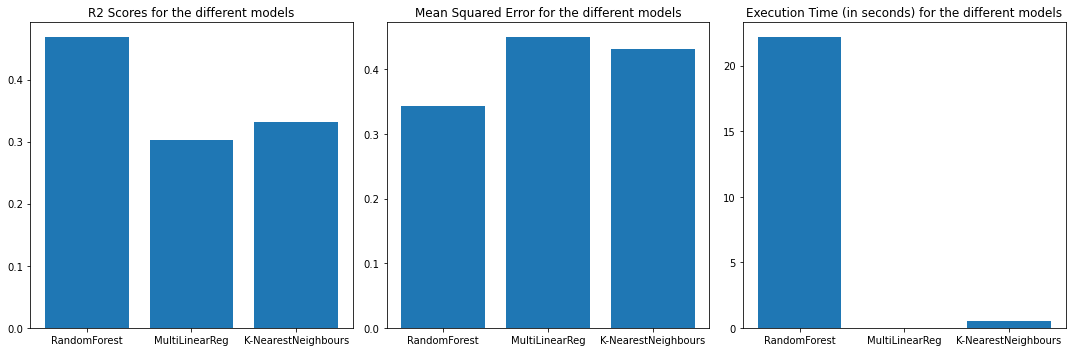

In [79]:
Models = ['RandomForest', 'MultiLinearReg', 'K-NearestNeighbours']
r2_scores = [r2_score(y_test, RF_pred), r2_score(y_test, MLR_pred), r2_score(y_test, KNN_pred)]
MeanSquaredError = [mean_squared_error(y_test, RF_pred), mean_squared_error(y_test, MLR_pred), mean_squared_error(y_test, KNN_pred)]
Process_Time = [toc1-tic1, toc2-tic2, toc3-tic3]

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.bar(Models, r2_scores)
plt.title("R2 Scores for the different models")
plt.tight_layout()

plt.subplot(1,3,2)
plt.bar(Models, MeanSquaredError)
plt.title("Mean Squared Error for the different models")
plt.tight_layout()

plt.subplot(1,3,3)
plt.bar(Models, Process_Time)
plt.title("Execution Time (in seconds) for the different models")
plt.tight_layout()

* Random Forest seems to do pretty good predictions since its R2 score is more towards 1.0 and Mean Squared Error is the least among the three.
* But in terms of Execution time, it is very very slow as compared to Multi Linear regression and K-Nearest Neighbors.